In [28]:
import matplotlib.pyplot as plt
import numpy as np

def pltDefault(ax):
    ax.axes.set_aspect('equal')
    pltCenterAxis(ax)

def pltCenterAxis(ax):
    #ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# 18.1
An LSI system with system function $H(z) = 1 - z^{-1} - z^{-2}$ is used to filter a discrete-time white noise random process with variance $\sigma_U^2 = 1$.
Determine the ACS and PSD of the output random process.


$$
\begin{align}
H(z) &= \sum_k { h[k]z^{-k}} \\
h(k) &= \left\{ \begin{matrix}
1 & \; k=0 \\
-1 & \; k=1 \\
-1 & \; k=2 \\
0 & \; \text{otherwise} \\
\end{matrix} \right. =
\partial[k] + \partial[k-1] + \partial[k-2]
\end{align}
$$

Which is shown below


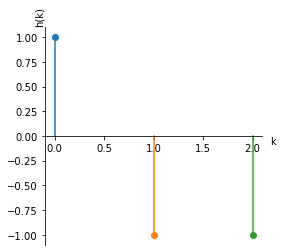

In [40]:
fig, ax = plt.subplots()
pltDefault(ax)
ax.set_ylabel("h(k)")
ax.set_xlabel("k")
ax.xaxis.set_label_coords(1.05, 0.5)
ax.yaxis.set_label_coords(0.0, 1.05)

ax.plot([0,0], [0,1], '-o', markevery=[1])
ax.plot([1,1], [0,-1], '-o', markevery=[1])
ax.plot([2,2], [0,-1], '-o', markevery=[1])

From the slides MM9.S10, we get the following expression, which is the autocorrelation function, whcih can be used to find the ACF:

$$
R_Y(k) = h(k) * h(-k) * \underbrace{R_x(k)}_{\sigma^2_U \partial(k)+\mu^2}
$$

Therefore we only need to calculate $h(k) * h(-k)$, as it is a white noise, see definition on SAK page 556, for the last part, that is times 1.

```
[1 -1 -1]
[1 -1 -1]
= 1*1 + -1*-1 + -1*-1 = 3

[1 -1 -1  0]
[0  1 -1 -1]
= 0*1 + 1*-1 + -1*0 = 0

[1 -1 -1  0  0]
[0  0  1 -1 -1]
= 0*1 + 0*-1 + 1*-1 = -1
```

We can check if this is true, by doing it the other way as well (it should be symmetri?), but can also be verified by numpy.

In [81]:
k = 4
a = np.array([1,-1,-1])
a = np.pad(a, (k,k))
# we are using correlate, instead of convolve as that is what is needed
v = np.correlate(a,b, mode="valid")
v



array([-1,  0,  3,  0, -1,  0,  0])

We can then write the function as

$$
\begin{align}
h(k) &= \left\{ \begin{matrix}
3 & \; k=0 \\
-1 & \; k=2 \\
-1 & \; k=-2 \\
0 & \; \text{otherwise} \\
\end{matrix} \right. =
3\partial[k] - \partial[k+2] - \partial[k-2]
\end{align}
$$

Now for calculating the PSD, which we have a definition for the PSD for a discrete time system, given in MM7.S6

$$
S_x(f) = \mathcal{F}\{R_x\}(f)= \sum_{k=-\infty}^\infty R_x(k) e^{-j2\pi kf} , \; |f| \geq \frac{1}{2}
$$

This gives us the following

$$
\begin{align}
S_x(f) &= 3 \cdot e^{-j2\pi \cdot 0 \cdot f} - e^{j4\pi f} - e^{-j4\pi f} \\
&= 3 - e^{j4\pi f} - e^{-j4\pi f} \\
&= 3 - (cos(4\pi f) + i sin(4\pi f)) - (cos(4\pi f) - i sin(4\pi f)) \\
&= 3 - cos(4\pi f) - i sin(4\pi f)) - cos(4\pi f) + i sin(4\pi f)) \\
&= 3 - 2cos(4\pi f) \\
\end{align}
$$

# 18.2
A discrete-time WSS random process with mean $\mu_U=2$ is input to an LSI system with impulse response $h[n] = (1/2)^n$ for $n \geq 2$ and $h[n] = 0$ for $n < 0$.
Find the mean sequence at the system output.

We can rewrite that as

$$
h(n) = \left\{ \begin{matrix}
\frac{1}{2}^n &, \; \text{for} \; n \geq 0 \\
0 &, \; \text{for} \; n \leq 0 \\
\end{matrix} \right.
$$

From the slides MM9.S13, we get the following expression, give the input $\mu_x$ we get the output $\mu_y$:

$$
\mu_y = \mu_x \sum_n h(n)
$$

Thin can be written as a geometric series, with the definition:

$$
ar^0 + ar^1 + \vdots + ar^n = \sum_{k=0}^\infty {ar^k} = \frac{a}{1-r} , \; \text{for} \; |r| < 1
$$

As n goes to infinity, the absolute value of r must be less than one for the series to converge. The sum then becomes

SOURCE: https://en.wikipedia.org/wiki/Geometric_series#Formula

This gives us

$$
\mu_y = 2 \frac{1}{1-\frac{1}{2}} = 4
$$

In [90]:
sum = 0
for x in range(0,100):
    sum += (1/2)**x
2*sum

4.0